In [1]:
import wavNN.training.plot_results as plots
from wavNN.training.training_metrics import TrainingMetrics

import matplotlib.pyplot as plt
import json 
import pandas as pd 
import numpy as np
import os

In [3]:
results_path = "../results/naive_params/"
extra_metrics = [TrainingMetrics.accuracy,
                TrainingMetrics.auc_roc,
                TrainingMetrics.f1,]

In [4]:
def _find_experiment(network, dataset): 
    all_experiments = os.listdir(results_path)
    exp_dir = [exp for exp in all_experiments if (network in exp) and (dataset in exp)][0]
    return exp_dir

def read_history_json(network, dataset): 
    experiment = _find_experiment(network, dataset)
    history_path = f"{results_path}{experiment}/history.json"
    with open(history_path, 'r') as path: 
        history = json.load(path)
    runs = []
    for key in history.keys(): 
        hist = pd.DataFrame(history[key]).astype(float)
        runs.append(hist)
    return runs


def read_param_json(network, dataset):
    experiment = _find_experiment(network, dataset)
    history_path = f"{results_path}{experiment}/parameter_history.json"
    with open(history_path, 'r') as path: 
        history = json.load(path)
    num_params = history['num_parameters']
    inference_time = history['inference_timing']
    training_time = history['training_timing']

    return num_params, inference_time, training_time

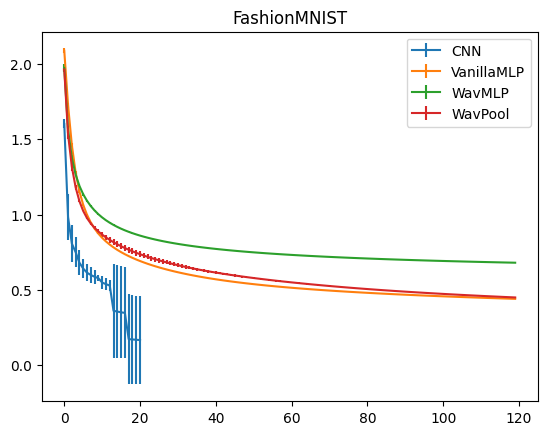

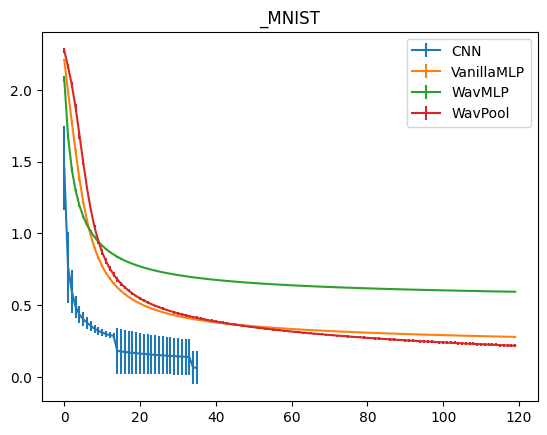

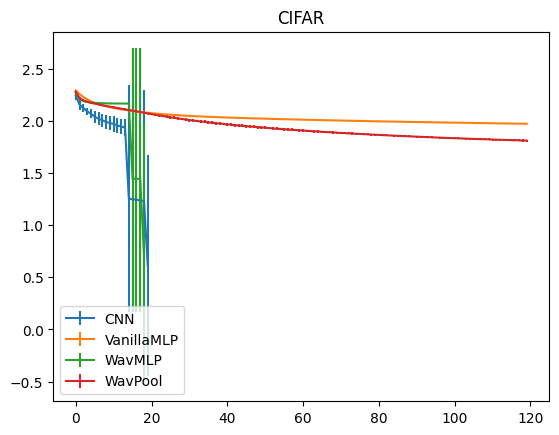

In [49]:
models = ["CNN", "VanillaMLP", "WavMLP", "WavPool"]
datasets = ["FashionMNIST", "_MNIST", "CIFAR"]

for dataset in datasets: 
    for model in models: 
        experiment = read_history_json(model, dataset)
        epochs = range(max([len(experiment[i]) for i in range(len(experiment))]))
        
        loss = pd.DataFrame([exp['train_loss'] for exp in experiment]).T.fillna(0, inplace=False)

        mean_loss = loss.mean(axis=1)
        loss_std = loss.std(axis=1)
        plt.errorbar(x=epochs, y=mean_loss, yerr=loss_std, label=model)


        # loss = pd.DataFrame([exp['val_loss'] for exp in experiment]).T.fillna(0, inplace=False)

        # mean_loss = loss.mean(axis=1)
        # loss_std = loss.std(axis=1)
        # plt.errorbar(x=epochs, y=mean_loss, yerr=loss_std, marker=".", alpha=.2)

    plt.legend()
    plt.title(dataset)
    plt.show()


CNN FashionMNIST


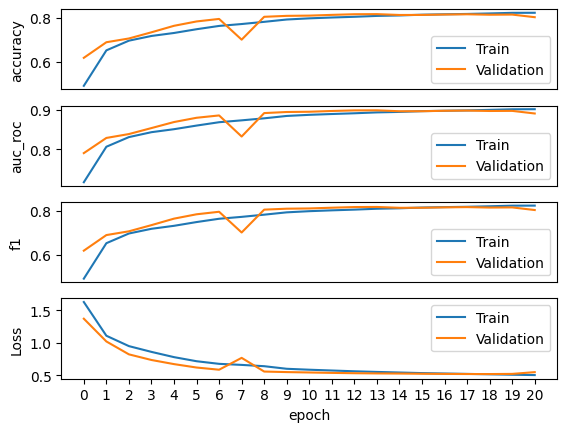

VanillaMLP FashionMNIST


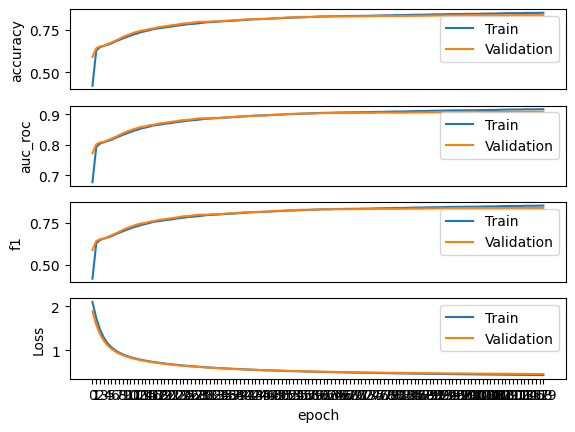

WavMLP FashionMNIST


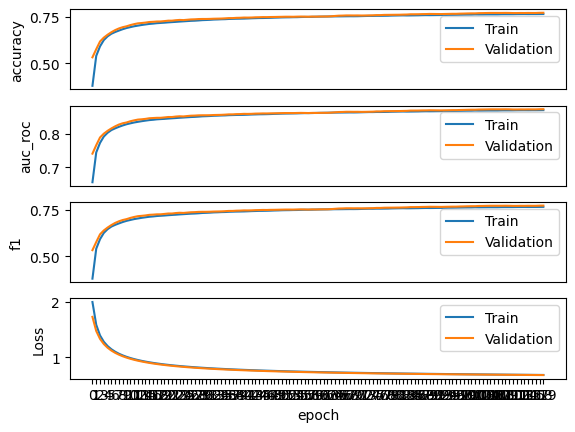

WavPool FashionMNIST


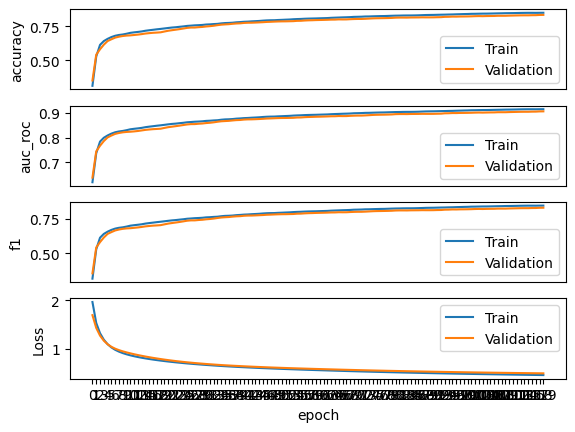

CNN _MNIST


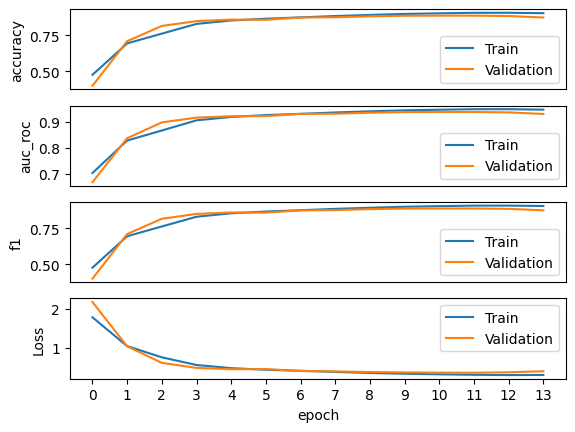

VanillaMLP _MNIST


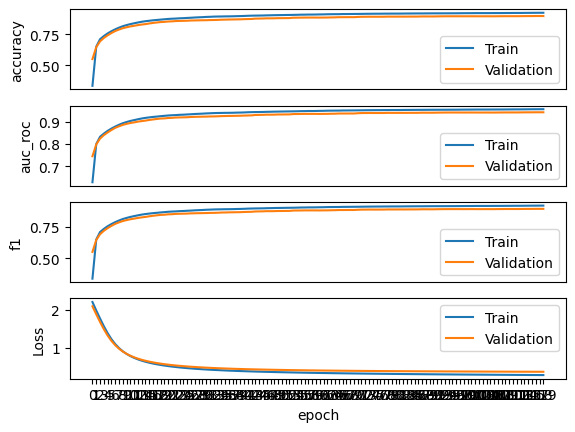

WavMLP _MNIST


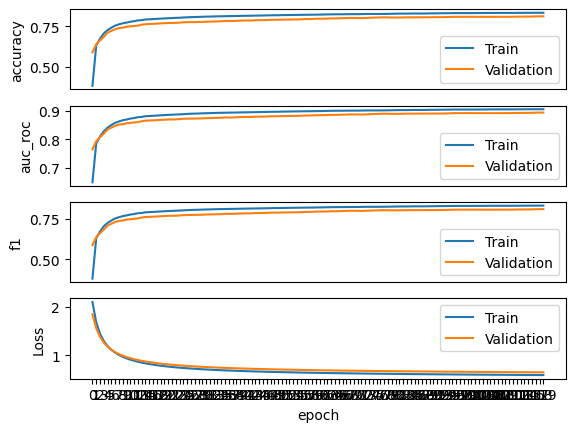

WavPool _MNIST


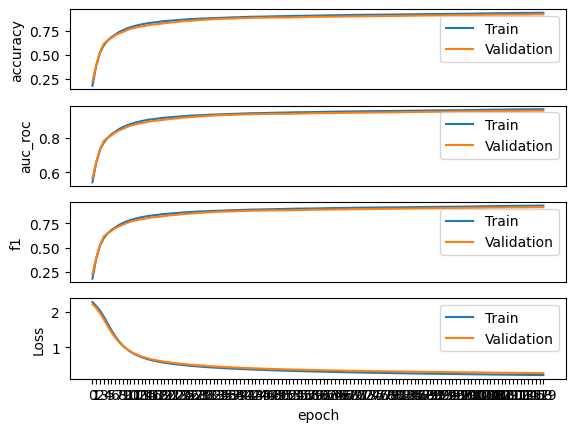

CNN CIFAR


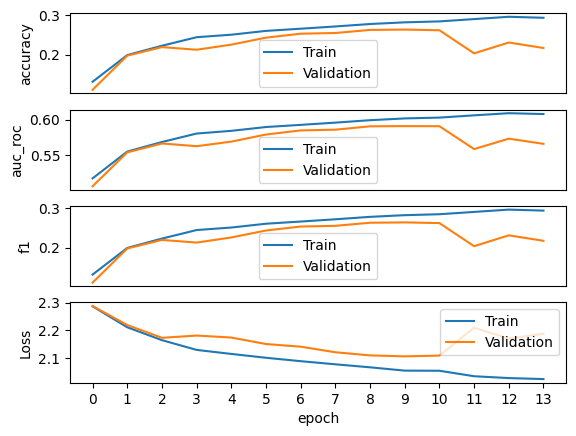

VanillaMLP CIFAR


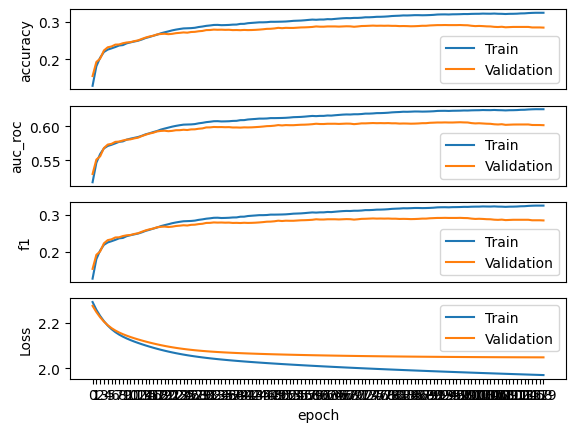

WavMLP CIFAR


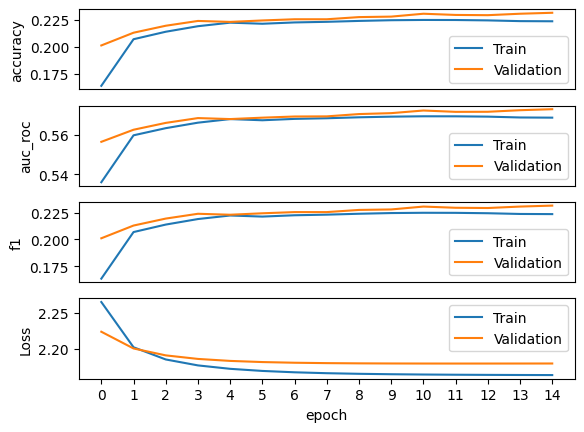

WavPool CIFAR


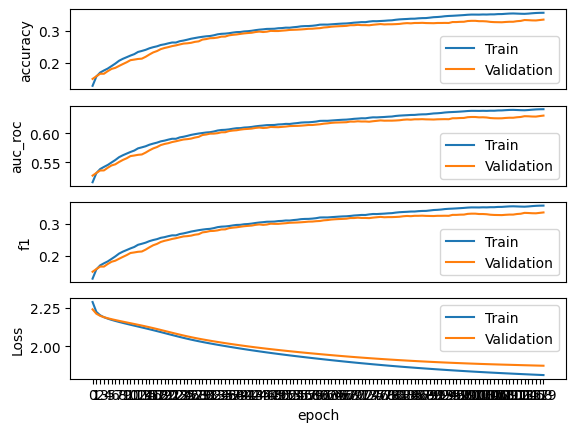

In [55]:
for dataset in datasets: 
    for model in models: 
        experiment = read_history_json(model, dataset)[0]
        print(f"{model} {dataset}")
        plots.plot_history(experiment, extra_metric_names=extra_metrics)



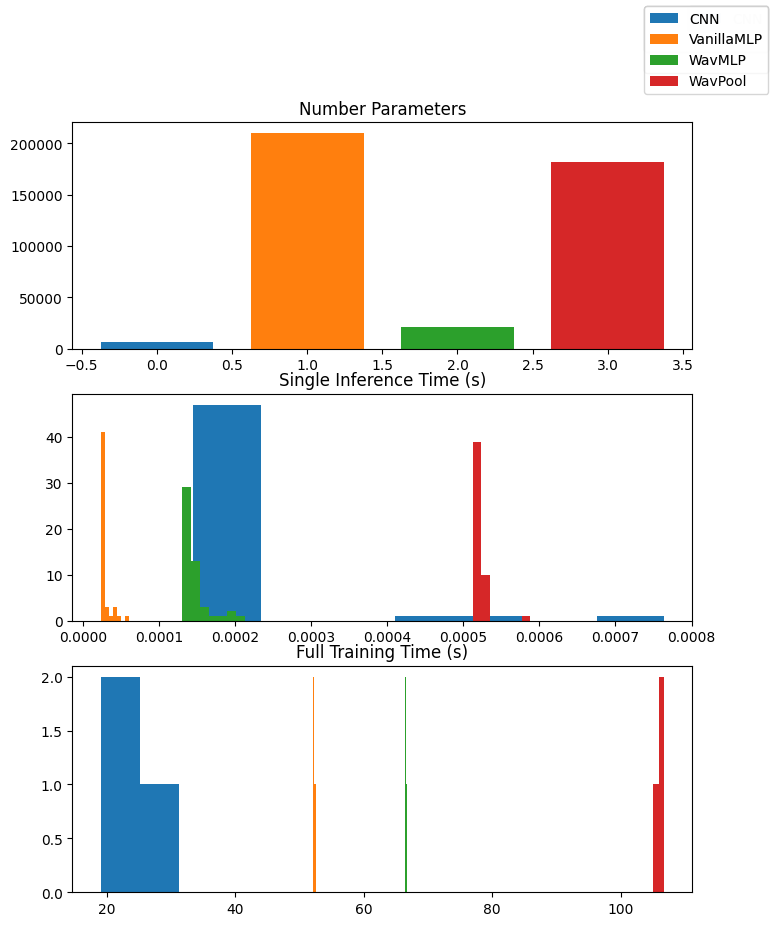

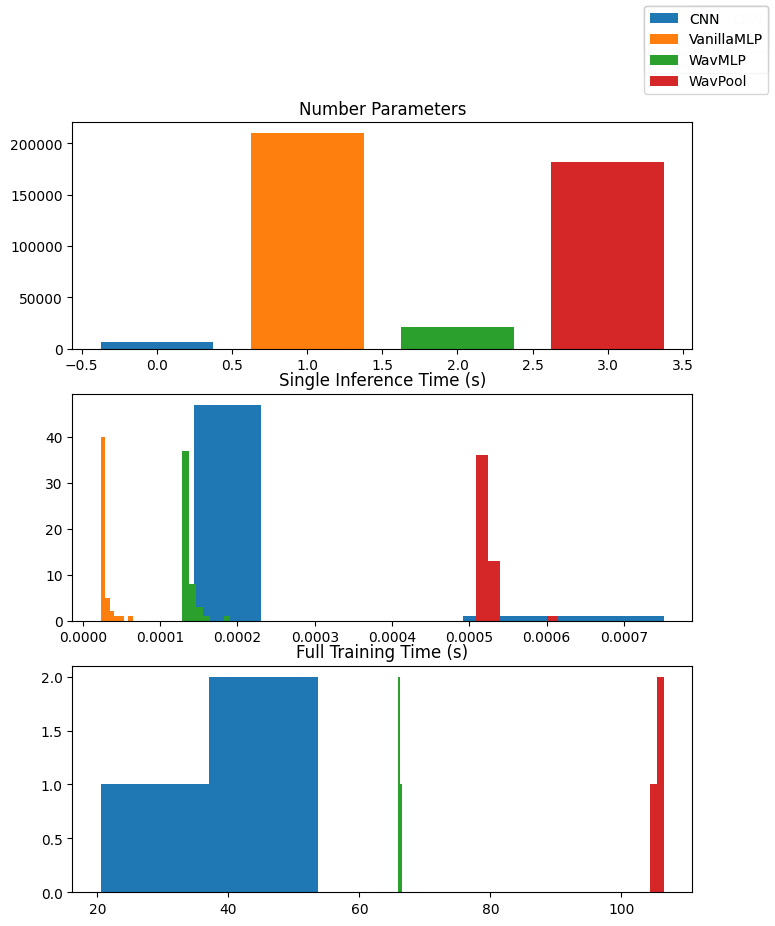

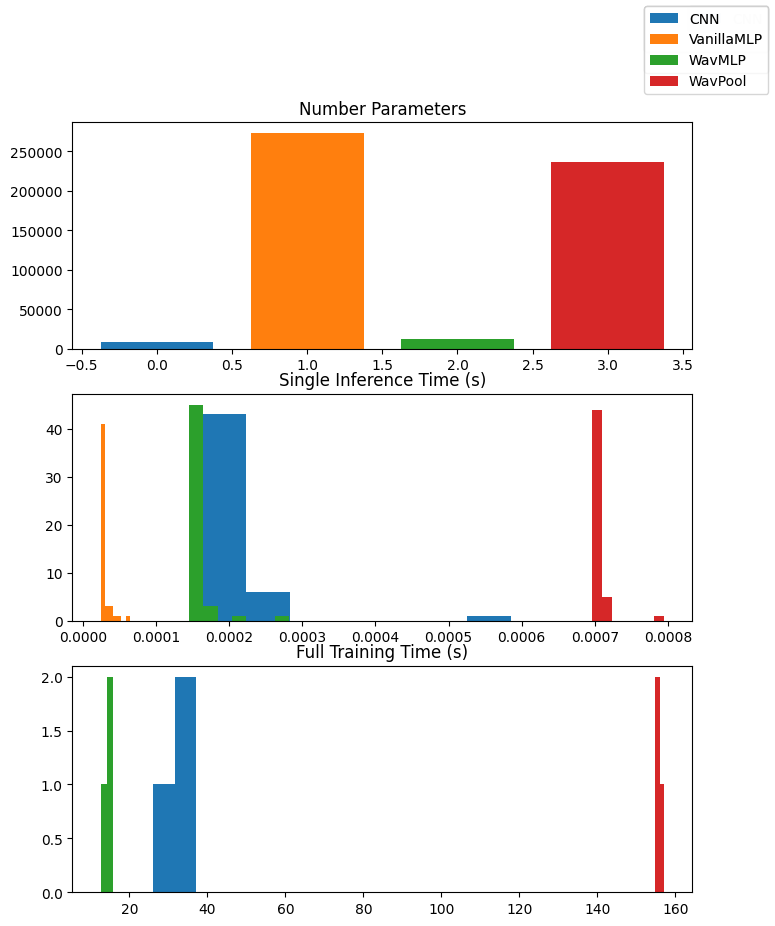

In [75]:
for dataset in datasets: 
    fig, subplots = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
    plt.title(dataset)
    for i, model in enumerate(models): 
        num_params, inference_time, training_time = read_param_json(model, dataset)
        #print(f"{model} {dataset}")

        subplots[0].bar([i], width=[.75], height=[num_params], label=model)
        subplots[0].set_title("Number Parameters")

        subplots[1].hist(inference_time, bins=int(np.sqrt(50)))
        subplots[1].set_title("Single Inference Time (s)")

        subplots[2].hist(training_time, bins=2)
        subplots[2].set_title("Full Training Time (s)")
        fig.legend()
    

    plt.show()


In [5]:
results_path = "../results/optimize_params/"

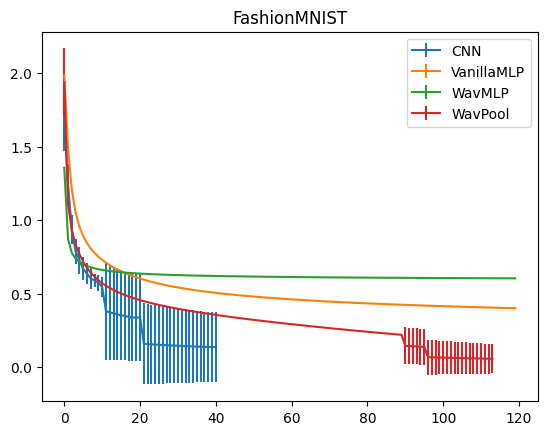

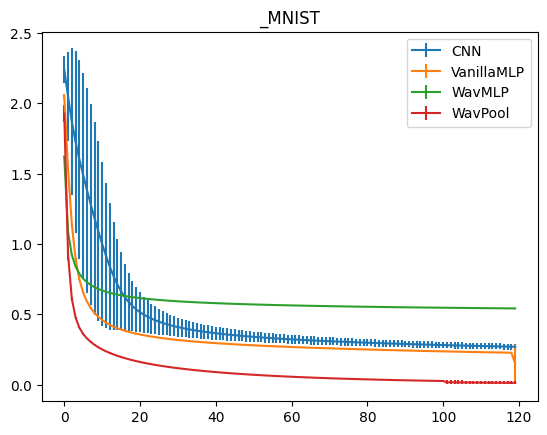

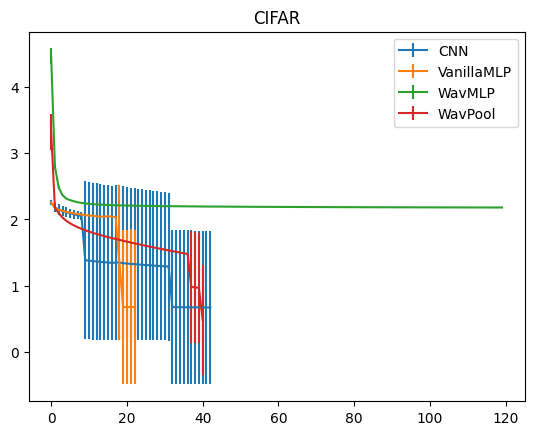

In [6]:
models = ["CNN", "VanillaMLP", "WavMLP", "WavPool"]
datasets = ["FashionMNIST", "_MNIST", "CIFAR"]

for dataset in datasets: 
    for model in models: 
        experiment = read_history_json(model, dataset)
        epochs = range(max([len(experiment[i]) for i in range(len(experiment))]))
        
        loss = pd.DataFrame([exp['train_loss'] for exp in experiment]).T.fillna(0, inplace=False)

        mean_loss = loss.mean(axis=1)
        loss_std = loss.std(axis=1)
        plt.errorbar(x=epochs, y=mean_loss, yerr=loss_std, label=model)

    plt.legend()
    plt.title(dataset)
    plt.show()


CNN FashionMNIST


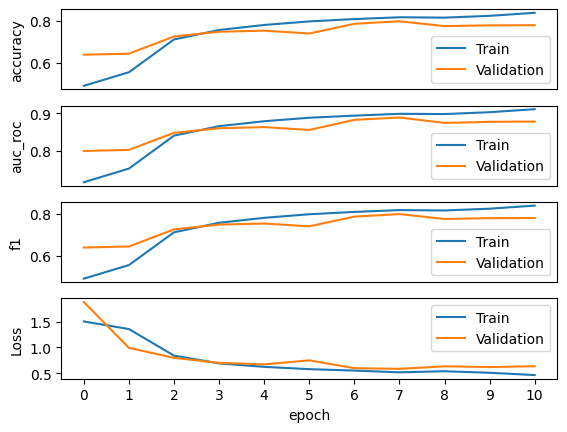

VanillaMLP FashionMNIST


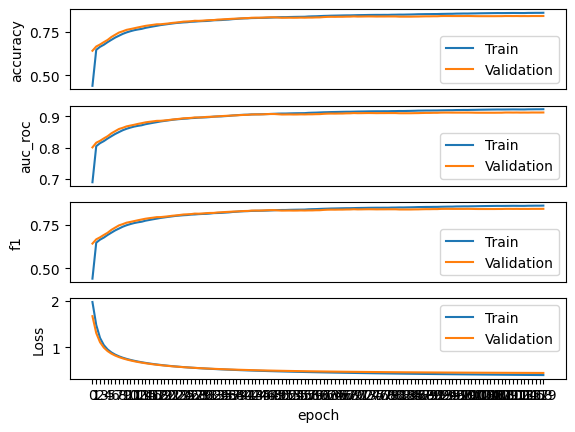

WavMLP FashionMNIST


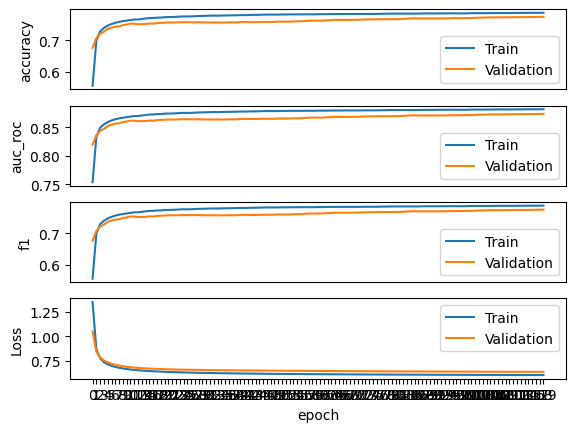

WavPool FashionMNIST


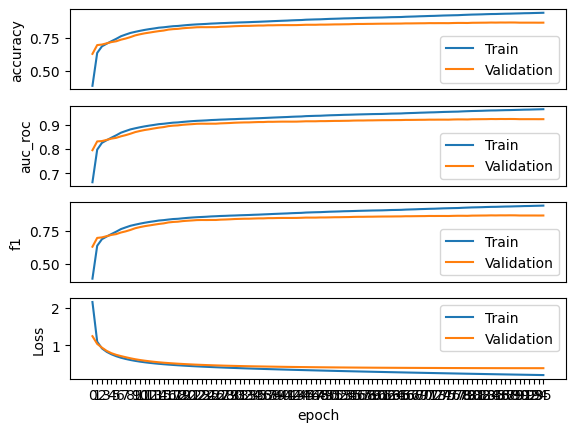

CNN _MNIST


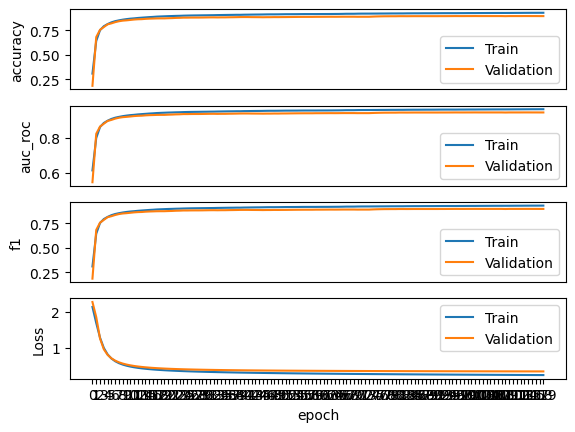

VanillaMLP _MNIST


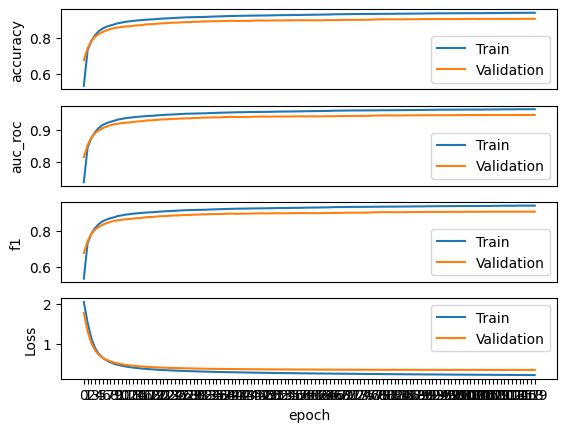

WavMLP _MNIST


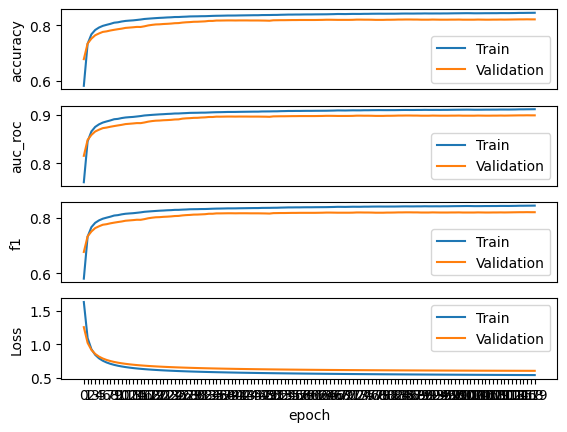

WavPool _MNIST


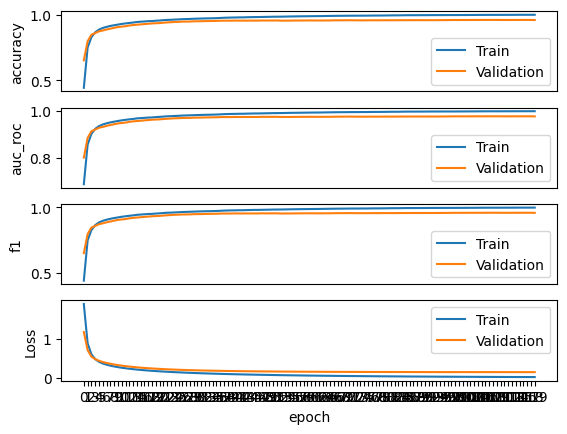

CNN CIFAR


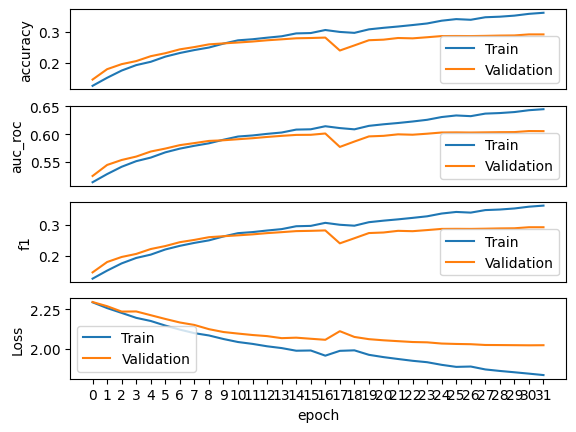

VanillaMLP CIFAR


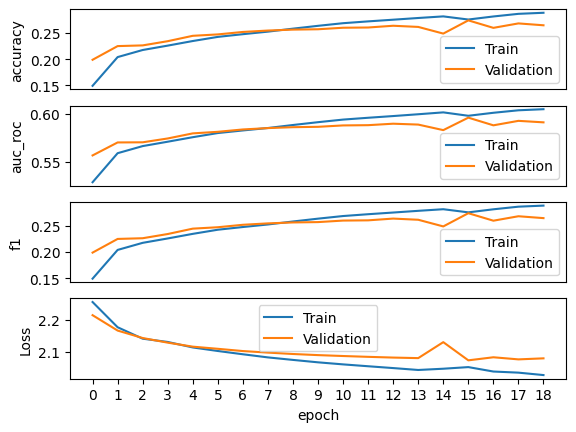

WavMLP CIFAR


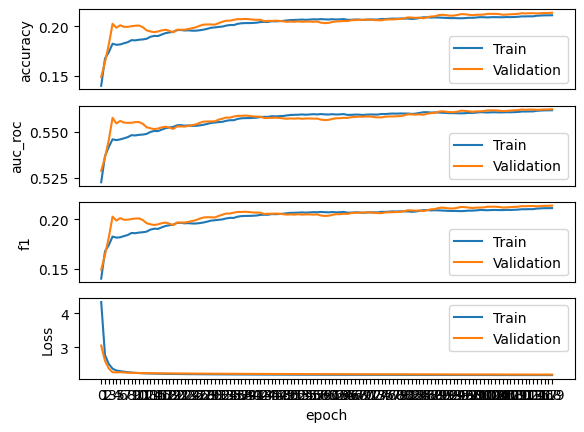

WavPool CIFAR


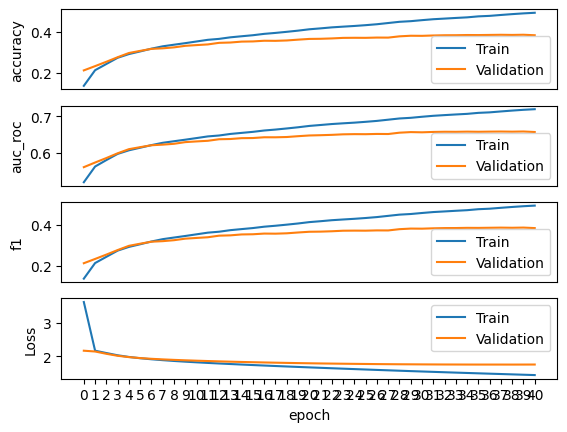

In [7]:
for dataset in datasets: 
    for model in models: 
        experiment = read_history_json(model, dataset)[0]
        print(f"{model} {dataset}")
        plots.plot_history(experiment, extra_metric_names=extra_metrics)


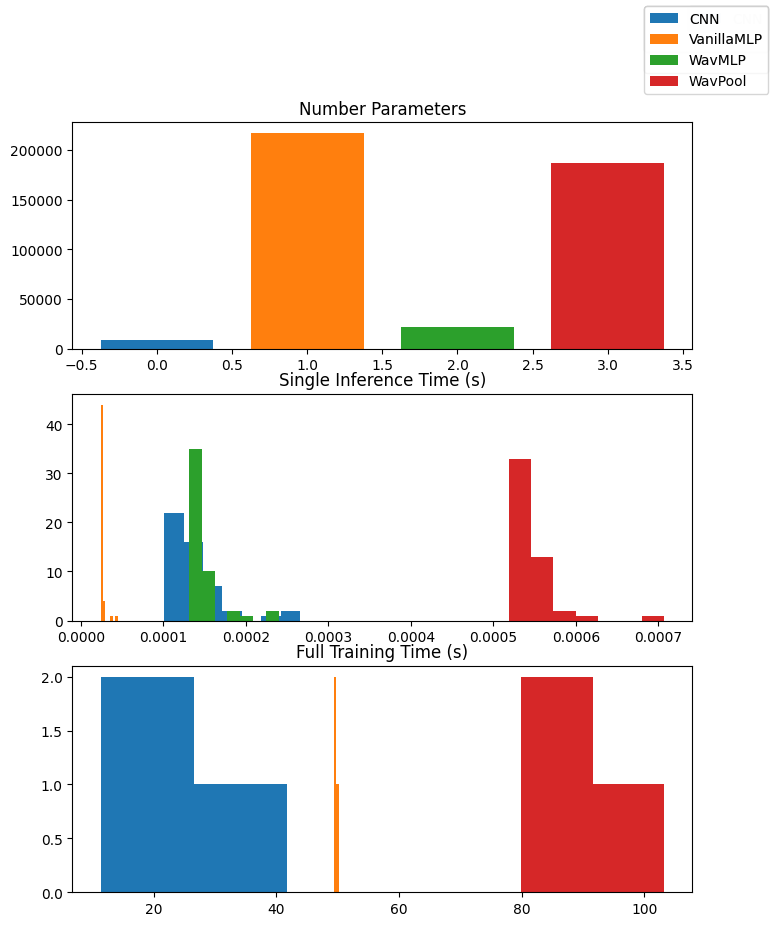

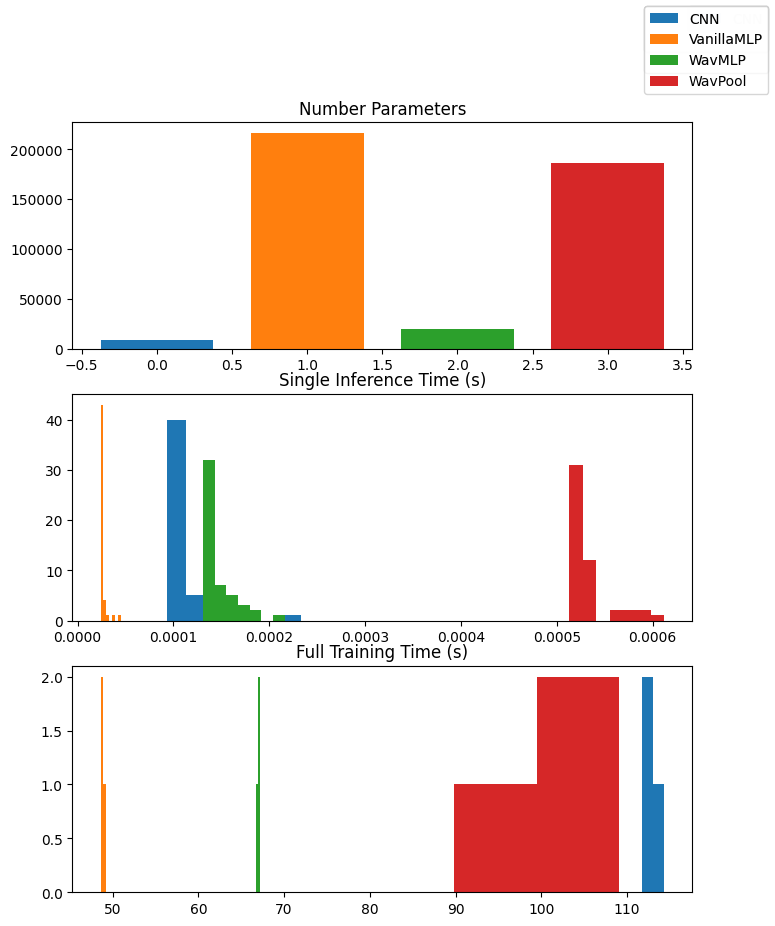

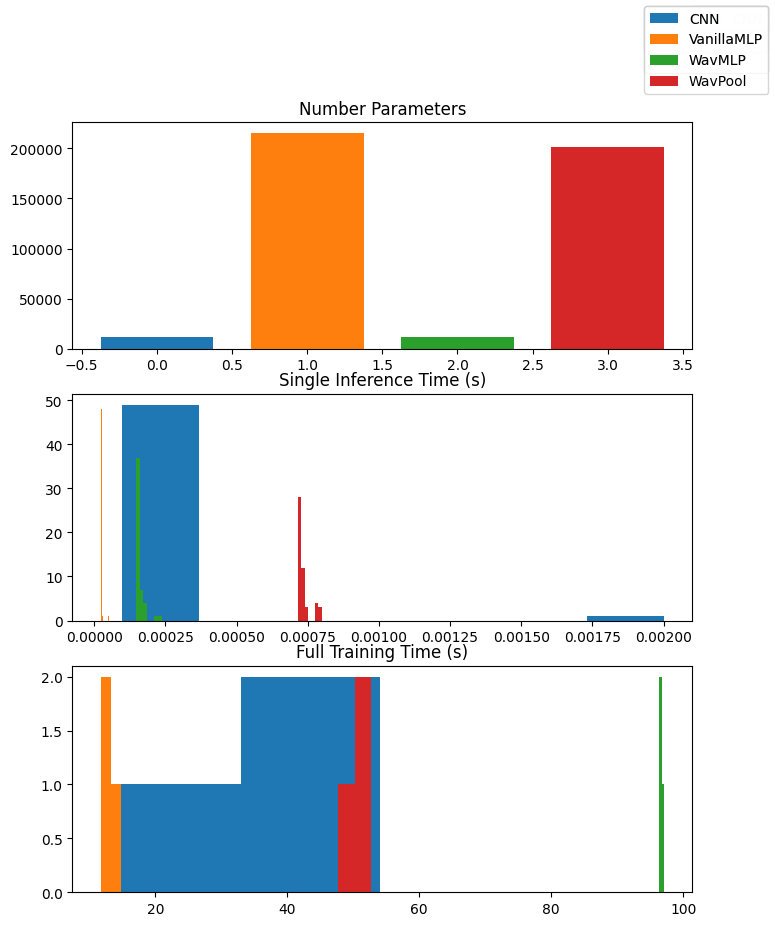

In [8]:
for dataset in datasets: 
    fig, subplots = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
    plt.title(dataset)
    for i, model in enumerate(models): 
        num_params, inference_time, training_time = read_param_json(model, dataset)
        #print(f"{model} {dataset}")

        subplots[0].bar([i], width=[.75], height=[num_params], label=model)
        subplots[0].set_title("Number Parameters")

        subplots[1].hist(inference_time, bins=int(np.sqrt(50)))
        subplots[1].set_title("Single Inference Time (s)")

        subplots[2].hist(training_time, bins=2)
        subplots[2].set_title("Full Training Time (s)")
        fig.legend()
    

    plt.show()
